In [2]:
import json
from glob import glob
from natsort import natsorted
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')

In [3]:
with open('./data/json/lastfm_linear/Graph_8-1615801589-min.json') as f:
    js = json.load(f)
js.keys()

dict_keys(['node_id', 'node_index', 'node_x', 'node_y', 'node_neighbors', 'node_perplexity', 'node_label', 'node_level', 'node_nodeCount', 'node_weight', 'node_parent', 'edge_source', 'edge_target', 'edge_level', 'edge_weight'])

In [59]:
fns = natsorted(glob('./data/batch-tree-result/*120.txt'))
fns

['./data/batch-tree-result/Graph_3.txt.mtxBatchTree128PARAOUT120.txt',
 './data/batch-tree-result/Graph_4.txt.weighted.mtxBatchTree128PARAOUT120.txt',
 './data/batch-tree-result/Graph_8.txt.weighted.mtxBatchTree128PARAOUT120.txt',
 './data/batch-tree-result/Graph_28.tol.txt.weighted.mtxBatchTree128PARAOUT120.txt',
 './data/batch-tree-result/Graph_28.top.txt.weighted.mtxBatchTree128PARAOUT120.txt',
 './data/batch-tree-result/Graph_42.txt.weighted.mtxBatchTree128PARAOUT120.txt',
 './data/batch-tree-result/Graph_5000.txt.mtxBatchTree128PARAOUT120.txt']

In [112]:
# results = [
    
#     [## topics
#         ## inputs
#         'data/batch-tree-result/Graph_5000.txt.mtxBatchTree128PARAOUT120.txt', ## node positions
#         'data/batch-tree-data/topics/Graph_5000.txt.labels', ## node labels
#         'data/batch-tree-data/topics/Graph_5000.txt.mtx', ## edges
        
#         ## output file name
#         'data/batch-tree-result-json/topics.json'
#     ],
    
#     [## last.fm linear
#         'data/batch-tree-result/Graph_8.txt.weighted.mtxBatchTree128PARAOUT120.txt',
#         'data/batch-tree-data/lastfm_variable_lengths_new/Graph_8.txt.labels',
#         'data/batch-tree-data/lastfm_variable_lengths_new/Graph_8.txt.weighted.mtx',
        
#         'data/batch-tree-result-json/last.fm-linear.json'
#     ],
    
    
#     [## topics-linear
#         'data/batch-tree-result-2/topics_linear.txt',
#         'data/batch-tree-data/small_topics_math/Graph_5000.txt.labels',
#         'data/batch-tree-data/small_topics_math/Graph_5000.txt.weighted.mtx',
        
# #         'data/batch-tree-data/topics/Graph_5000.txt.labels',
# #         'data/batch-tree-data/topics/Graph_5000.txt.mtx',
        
#         'data/batch-tree-result-json/topics-linear.json'
#     ],
    
# #     ## tol-linear
# #     [
# #         'data/batch-tree-result/Graph_4.txt.weighted.mtxBatchTree128PARAOUT120.txt',
# #         'data/batch-tree-data/tol_var_len/Graph_4.txt.labels',
# #         'data/batch-tree-data/tol_var_len/Graph_4.txt.weighted.mtx',
# #         'data/batch-tree-result-json/tol-linear.json'
# #     ]
    
# ]

In [114]:
# For figure 10 (BT)
results = [
    [## last.fm linear, bt-delg
        '../BatchTree-main/datasets/output/Graph_8.txt.weighted.mtxBatchTree128PARAOUT600.txt',
        'data/batch-tree-data/lastfm_variable_lengths_new/Graph_8.txt.labels',
        'data/batch-tree-data/lastfm_variable_lengths_new/Graph_8.txt.weighted.mtx',
        
        'data/batch-tree-result-json/figure-10/last.fm-linear-delg-mode.json'
    ],
    
#     [## last.fm linear, bt-cg
#         '../BatchTree-main/datasets/output/Graph_8.txt.weighted.mtxBatchTree128PARAOUT120.txt',
#         'data/batch-tree-data/lastfm_variable_lengths_new/Graph_8.txt.labels',
#         'data/batch-tree-data/lastfm_variable_lengths_new/Graph_8.txt.weighted.mtx',
        
#         'data/batch-tree-result-json/figure-10/last.fm-linear-cg-mode.json'
#     ],
]

In [117]:
for pos, label, edge, out_fn in results:
    print(pos)
    with open(pos) as f:
        nodes = [l.strip().split('\t') for l in f]
        node_x = [float(x[0]) for x in nodes]
        node_y = [float(x[1]) for x in nodes]
        node_id = [int(x[2]) for x in nodes]
        node_index = list(range(len(node_id)))
        node_level = [1] * len(node_id)
    with open(label) as f:
        node_label = [l.strip() for l in f]
                     
    with open(edge) as f:
        f = f.readlines()[2:]
        edges = [l.strip().split() for l in f]
        edge_source = [int(e[0]) for e in edges]
        edge_target = [int(e[1]) for e in edges]
                    
            
    out = dict(
        node_x=node_x,
        node_y=node_y,
        node_id=node_id,
        node_index=node_index,
        node_label=node_label,

        node_level=node_level, 

        edge_source=edge_source,
        edge_target=edge_target,
    )
    with open(out_fn, 'w') as f:
        json.dump(out, f)

../BatchTree-main/datasets/output/Graph_8.txt.weighted.mtxBatchTree128PARAOUT600.txt


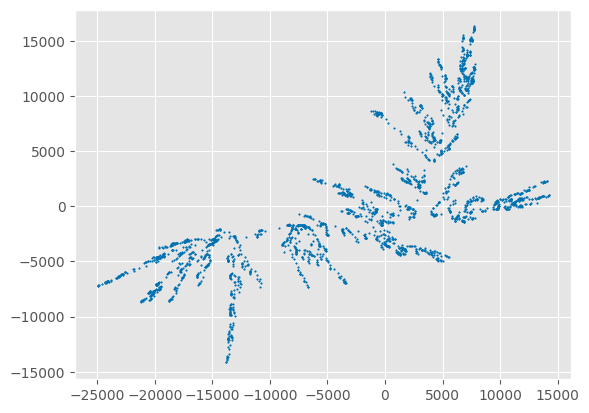

In [116]:
xy = np.array(list(zip(node_x, node_y)))
plt.scatter(xy[:,0], xy[:,1], s=1)

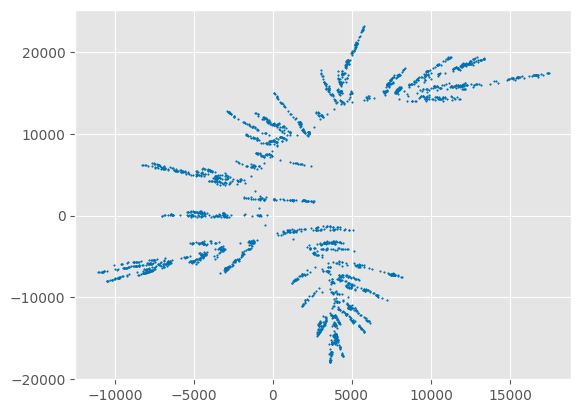

In [118]:
xy = np.array(list(zip(node_x, node_y)))
plt.scatter(xy[:,0], xy[:,1], s=1)